# AML-2203
## Assignment : Prediction of product rating from customer reviews

### Group Members:
- Harvi Kakadiya - C0894969
- Rutvi Kanani - C0896282
- Riya Shah - C0893957
- Shreyal Patel - C0894466
- Shruti Sumera - C0896263

**GitHub Repository Link:**  

## Step1: Data Scrapping

### Ebay Link Scrapper

In [ ]:
# run !pip install beautifulSoup
# imports
import requests
from bs4 import BeautifulSoup
import time
import random

# define headers to select and navigate HTML elements
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0'}

for i in range(1,41):
    link = f"https://www.ebay.ca/b/Computer-Monitors-Projectors-Accessories/162497/bn_1636723?_pgn={i}"
    # parse HTML code of the link by using request library get() method
    mainSoup = BeautifulSoup(requests.get(link, headers=headers).content, 'html.parser')

    # from HTML parse code find the tag which has asked attribute
    all_div_tag = mainSoup.find_all("div",{"class":"s-item__info clearfix"})

    for each in all_div_tag:
        # get href from the tag
        href = each.find("a").get("href")
        # write that url into a .txt file
        with open("ebay_monitors_link.txt", "a") as f:
            f.write(href+'\n')
    print("page",i,"done")

    # set break of random float second to avoid captcha
    random_float = random.uniform(1,4)
    time.sleep(random_float)

### Ebay Data Scrapper

In [ ]:
# imports
import requests
from bs4 import BeautifulSoup
import json
import time
import random

i = 1
final_object_list = []

# define headers to select and navigate HTML elements
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0'}

# render the file with links to iterate 
with open(r'C:\Users\Kaswala\Desktop\Term2_Lambton\Python_2203\scraping\bestbuy\ebay_laptop_link.txt', 'r') as file:
    links = [line.strip() for line in file]

for link in links:
    # parse HTML code of the link by using request library get() method
    mainSoup = BeautifulSoup(requests.get(link, headers=headers).content, 'html.parser')
    # set break of random float second to avoid captcha
    random_float = random.uniform(1,4)
    time.sleep(random_float)
    try:
        # from HTML parse code find the tag which has asked attribute

        # collect text of name of product
        name = mainSoup.find("span",{"class":"ux-textspans ux-textspans--BOLD"}).text
        # collect text of price of product
        price = mainSoup.find("div",{"class":"x-price-primary"}).text

        try:
            # collect text of condition of product
            condition = mainSoup.find_all("span",{"data-testid":"ux-textual-display"})[0].text
        except:
            condition = ""

        try:
            # collect text of category of product
            category = mainSoup.find_all("a",{"class":"seo-breadcrumb-text"})[1].text
        except:
            category = ""

        try:
            # collect text of sub category of product
            sub_category = mainSoup.find_all("a",{"class":"seo-breadcrumb-text"})[2].text
        except:
            sub_category = ""

        try:
            # collect text of rating of product
            rating = mainSoup.find("div",{"class":"d-stores-info-categories__container__info__section__item"}).find("span").text
        except:
            rating = ""

        try:
            # collect text of overview of product
            overview = mainSoup.find("div",{"data-testid":"ux-layout-section-module-evo"}).text
        except:
            overview = ""

        try:
            # collect text of count of reviews of product
            review_count = mainSoup.find("span",{"class":"SECONDARY"}).text
        except:
            review_count = "0"

        try:
            # collect text of feedbacks of product
            feedback_tag = mainSoup.find_all("div",{"class":"fdbk-container__details__comment"})
            feedback = [each.text for each in feedback_tag]
        except:
            feedback = []

        temp_dict = {
                    "url":link,
                    "category":category,
                    "sub_category":sub_category,
                    "name":name,
                    "price":price,
                    "review_count":review_count,
                    "condition":condition,
                    "overview":overview,
                    "rating":rating,
                    "feedback":feedback
                    }
        final_object_list.append(temp_dict)

        # dump dictionary into json
        data = json.dumps(final_object_list, indent=4)  
        # write dumped data into json file
        with open("ebay_laptop_data.json", "w", encoding='utf-8') as outfile:
            outfile.write(data, )
        print(i," Successfully scraped: ",link)
        i+=1
    except:
        print("Error expected!!!!", link)

        # whichever links will not be scraped, will be stored into a file to analyze the reason
        with open("error_ebay_laptop.txt", "a") as f:
            f.write(link+'\n')


## Step-2 Cleaning Data

- **Dataset Link**: https://mylambton-my.sharepoint.com/:f:/r/personal/c0894969_mylambton_ca/Documents/Harvi/aimt_term2/scraping?csf=1&web=1&e=BJolT7

In [1234]:
import pandas as pd

In [1235]:
df = pd.read_json("C:\\Users\\rutvi\\OneDrive\\Desktop\\sept_mid_sem\\python_project\\ebay\\ebay_dataset.json")

In [1236]:
df.head(3)

,url,category,sub_category,name,price,review_count,condition,overview,rating,feedback
0,https://www.ebay.ca/itm/394155272487?hash=item...,Cell Phones & Accessories,Cell Phones & Smartphones,"Apple iPhone 12 - Unlocked - 64GB, 128GB, 256G...",C $533.80,"(1,530)",Good - Refurbished,Item specificsConditionGood - Refurbished: The...,96.1%,"[I’ve bought here before and I’m back again, e..."
1,https://www.ebay.ca/itm/393531906094?hash=item...,Cell Phones & Accessories,Cell Phones & Smartphones,Apple iPhone 11 Pro Max - Unlocked - 64GB / 25...,C $469.00,"(1,530)",Excellent - Refurbished,Item specificsConditionExcellent - Refurbished...,96.1%,"[I’ve bought here before and I’m back again, e..."
2,https://www.ebay.ca/itm/394360490980?hash=item...,Cell Phones & Accessories,Cell Phones & Smartphones,"Apple iPhone 12 Pro - Unlocked - 128GB, 256GB,...",C $696.15,"(1,530)",Excellent - Refurbished,Item specificsConditionExcellent - Refurbished...,96.1%,"[I’ve bought here before and I’m back again, e..."


In [1237]:
# total number of rows and columns in the dataset
df.shape

(6785, 10)

In [1238]:
# columns in the dataset
df.columns

Index(['url', 'category', 'sub_category', 'name', 'price', 'review_count',
       'condition', 'overview', 'rating', 'feedback'],
      dtype='object')

In [1239]:
# drop unwanted column url
df = df.drop('url', axis=1)

In [1240]:
df['price'].head()

0     C $533.80
1     C $469.00
2     C $696.15
3    US $179.99
4     C $483.65
Name: price, dtype: object

In [1241]:
# Clean the data of price column here

# Define the exchange rate
usd_to_cad_rate = 1.3

# Extract the currency code and numeric part
currency_data = df['price'].str.extract('([A-Za-z]+)\s+\$(\d+\.\d+)')
currency_data
df['currency'] = currency_data[0]
df['price(CAD)'] = currency_data[1].astype(float)

# Convert USD to CAD
df.loc[df['currency'] == 'US', 'price(CAD)'] *= usd_to_cad_rate

# drop unwanted columns
df = df.drop('currency', axis=1)
df = df.drop('price', axis=1)

df['price(CAD)'].head()

0    533.800
1    469.000
2    696.150
3    233.987
4    483.650
Name: price(CAD), dtype: float64

In [1242]:
# clean the data of review column
df['review_count'].head()

0     (1,530)
1     (1,530)
2     (1,530)
3    (24,991)
4     (1,530)
Name: review_count, dtype: object

In [1243]:
# Remove parentheses and commas, and convert to numeric
df['review_count'] = pd.to_numeric(df['review_count'].str.replace('[(),]', '', regex=True), errors='coerce')
df['review_count'].head()

0     1530
1     1530
2     1530
3    24991
4     1530
Name: review_count, dtype: int64

In [1244]:
# clean the data of overview column
df['overview'].head()

0    Item specificsConditionGood - Refurbished: The...
1    Item specificsConditionExcellent - Refurbished...
2    Item specificsConditionExcellent - Refurbished...
3    Item specificsConditionUsedAn item that has be...
4    Item specificsConditionExcellent - Refurbished...
Name: overview, dtype: object

In [1245]:
# Remove the specified prefix
df['overview'] = df['overview'].str.replace('Item specificsCondition', '', regex=False)

# Display the cleaned DataFrame
print(df[['overview']])

                                               overview
0     Good - Refurbished: The item shows moderate we...
1     Excellent - Refurbished: The item is in like-n...
2     Excellent - Refurbished: The item is in like-n...
3     UsedAn item that has been used previously. The...
4     Excellent - Refurbished: The item is in like-n...
...                                                 ...
6780  UsedAn item that has been used previously. The...
6781  Certified - RefurbishedThe item is in a pristi...
6782  UsedAn item that has been used previously. The...
6783  UsedAn item that has been used previously. The...
6784  Used: An item that has been used previously. T...

[6785 rows x 1 columns]


In [1246]:
# remove columns with blank data
df = df[df['category'] != ""]

In [1247]:
# clean data of rating column
df['rating'].head()

0    96.1%
1    96.1%
2    96.1%
3    99.5%
4    96.1%
Name: rating, dtype: object

In [1248]:
# Remove the percentage sign and convert to numeric
df['rating'] = pd.to_numeric(df['rating'].str.rstrip('%'), errors='coerce')

# Display the cleaned DataFrame
df['rating'].head()

0    96.1
1    96.1
2    96.1
3    99.5
4    96.1
Name: rating, dtype: float64

In [1249]:
# clean the data of overview column
df['overview'].head()

0    Good - Refurbished: The item shows moderate we...
1    Excellent - Refurbished: The item is in like-n...
2    Excellent - Refurbished: The item is in like-n...
3    UsedAn item that has been used previously. The...
4    Excellent - Refurbished: The item is in like-n...
Name: overview, dtype: object

In [1250]:
# used nltk to clean overview text data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# create a function to clean and process text
def process_text(text):    
    # Remove punctuation and convert to lowercase
    text = text.lower().translate(str.maketrans("", "", string.punctuation))

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # stemming using Porter Stemmer
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(word) for word in filtered_tokens]

    # lemmatization using WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return lemmatized_tokens

# Apply the processing function to each overview
df['processed_overview'] = [process_text(overview) for overview in df['overview']]

# Display the processed review
df['processed_overview'][0][0:5]

['good', 'refurbish', 'item', 'show', 'moder']

In [1251]:
df = df.drop('overview', axis=1)
df = df.drop('feedback', axis=1)

In [1252]:
df.shape

(6760, 8)

### Handling Missing Values

In [1253]:
missing_values = df.isnull().sum()
missing_values

category                0
sub_category            0
name                    0
review_count            0
condition               0
rating                 22
price(CAD)            203
processed_overview      0
dtype: int64

In [1254]:
# removing the rows with missing values
df.dropna(inplace=True)

### Check for duplicate data

In [1255]:
duplicate_rows_here = df[df.columns.difference(['processed_overview'])].duplicated().sum()
duplicate_rows_here

647

In [1257]:
# Remove duplicate rows
df.drop_duplicates(subset=df.columns.difference(['processed_overview']), inplace=True)

In [1258]:
df.shape

(5892, 8)

## Step-3 Visualization to demonstrate the distribution of various columns

In [1259]:
# import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [1260]:
# define numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['review_count', 'rating', 'price(CAD)'], dtype='object')

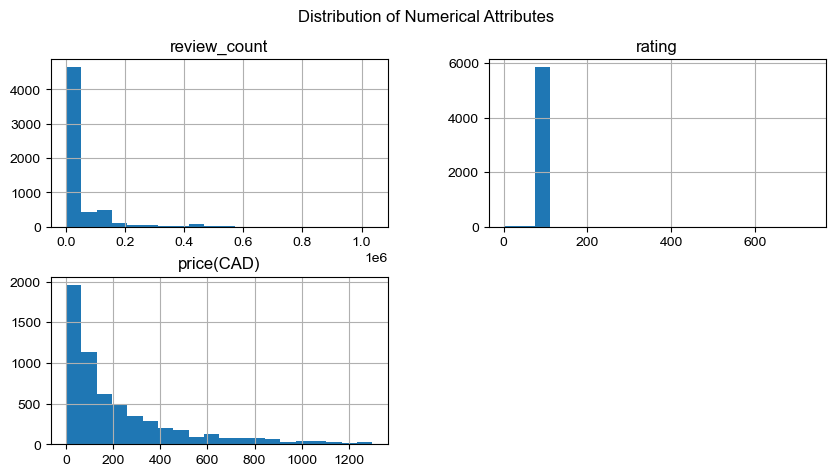

In [1261]:
# Visualize the distribution of numerical attributes
df[numeric_columns].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribution of Numerical Attributes')
plt.show()
# numeric_columns

In [1262]:
# define categorical columns
categorical_columns = ['category', 'sub_category']
categorical_columns

['category', 'sub_category']

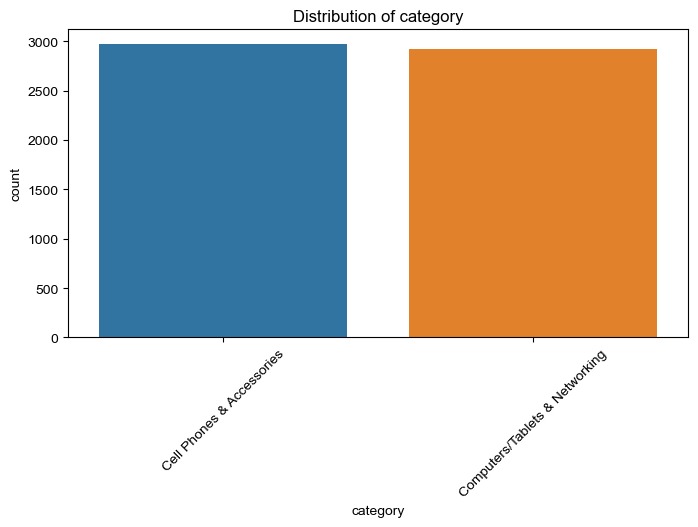

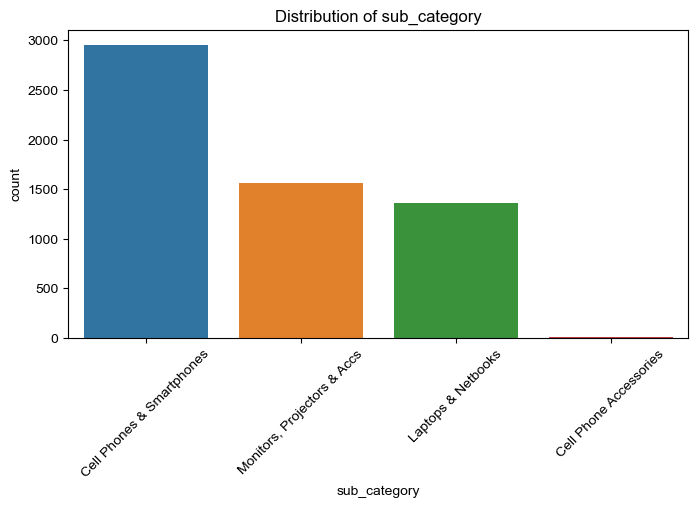

In [1263]:
# Visualize the distribution of categorical attributes
plt.rcParams['axes.unicode_minus'] = False  # Handle missing minus sign, if necessary
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [1264]:
df['category'].value_counts()

Cell Phones & Accessories         2970
Computers/Tablets & Networking    2922
Name: category, dtype: int64

In [1265]:
df['sub_category'].value_counts()

Cell Phones & Smartphones      2958
Monitors, Projectors & Accs    1563
Laptops & Netbooks             1359
Cell Phone Accessories           12
Name: sub_category, dtype: int64

In [1266]:
df.shape

(5892, 8)

## Step-4 Pandas Profiling

In [1267]:
# installing ydata-profiling library to generate report
!pip install ydata-profiling

In [1269]:
from ydata_profiling import ProfileReport

# Generate the data profiling report 
report = ProfileReport(df, title='Ebay_Data')

# Save the report to an HTML file
report.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Step 5: Encoding: One-Hot Encoding

In [1270]:
# Here we are using one-hot encoding because we have non-ordinal categorical columns

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['category', 'sub_category'], prefix=['category', 'sub_category'])

# Display the DataFrame after encoding
df.head(3)

,name,review_count,condition,rating,price(CAD),processed_overview,category_Cell Phones & Accessories,category_Computers/Tablets & Networking,sub_category_Cell Phone Accessories,sub_category_Cell Phones & Smartphones,sub_category_Laptops & Netbooks,"sub_category_Monitors, Projectors & Accs"
0,"Apple iPhone 12 - Unlocked - 64GB, 128GB, 256G...",1530,Good - Refurbished,96.1,533.80,"[good, refurbish, item, show, moder, wear, bac...",1,0,0,1,0,0
1,Apple iPhone 11 Pro Max - Unlocked - 64GB / 25...,1530,Excellent - Refurbished,96.1,469.00,"[excel, refurbish, item, likenew, condit, back...",1,0,0,1,0,0
2,"Apple iPhone 12 Pro - Unlocked - 128GB, 256GB,...",1530,Excellent - Refurbished,96.1,696.15,"[excel, refurbish, item, likenew, condit, back...",1,0,0,1,0,0


## Step 6: Identify Outliers with different technique

### boxplots

In [1271]:
# creating a common function for plotting boxplots
def plot_boxplot(data, column_name):
    plt.figure(figsize=(5, 4))
    plt.boxplot(data, vert=False)
    plt.title("Boxplots for "+column_name)
    plt.show()

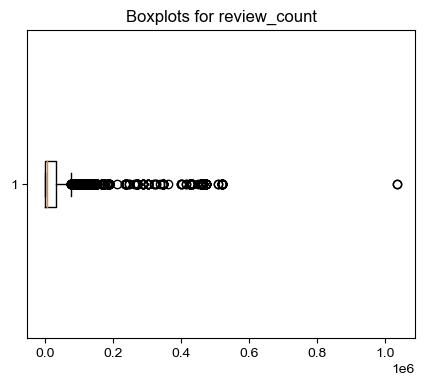

In [1272]:
# plot a box plot for column review_count
plot_boxplot(df["review_count"], "review_count")

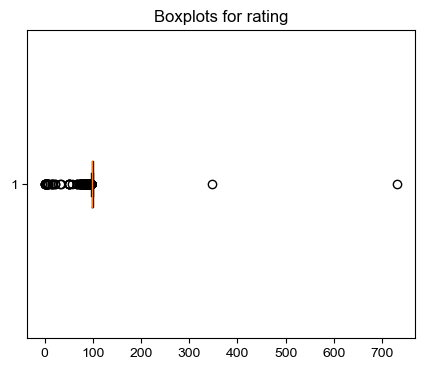

In [1273]:
# plot a box plot for column rating
plot_boxplot(df["rating"], "rating")

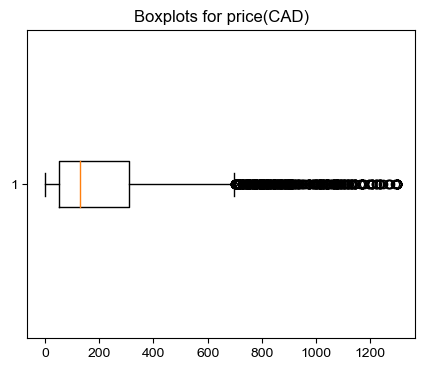

In [1274]:
# plot a box plot for column price(CAD)
plot_boxplot(df["price(CAD)"], "price(CAD)")

### IQR

In [1275]:
# creating a common function to find outliers with IQR
def find_outliers_with_IQR(column_name):
    
    # Calculate the IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify potential outliers
    outliers = df[(df[column_name]<(Q1 - 1.5 * IQR)) | (df[column_name]>(Q3 + 1.5 * IQR))]
    
    # returns the number of rows with outliers
    return outliers.shape[0]

In [1276]:
print("Number of Rows with outliers in column review_count :", find_outliers_with_IQR("review_count"))

Number of Rows with outliers in column review_count : 934


In [1277]:
print("Number of Rows with outliers in column rating :", find_outliers_with_IQR("rating"))

Number of Rows with outliers in column rating : 491


In [1278]:
print("Number of Rows with outliers in column price(CAD) :", find_outliers_with_IQR("price(CAD)"))

Number of Rows with outliers in column price(CAD) : 434


## Step 7: Handle outliers with 3 different techniques:

### **1. Quantile-based Flooring and Capping**

In [1279]:
# importing numpy
import numpy as np

In [1280]:
# function that removes outlier and retunrns a dataframe without outliers
def remove_outliers(dataframe, column_name, floor_value, cap_value):
    floor = (dataframe[column_name].quantile(floor_value))
    cap = (dataframe[column_name].quantile(cap_value))
    new_df = dataframe.copy()
    new_df[column_name] = np.where(new_df[column_name]<floor, floor, new_df[column_name])
    new_df[column_name] = np.where(new_df[column_name]>cap, floor, new_df[column_name])
    return new_df

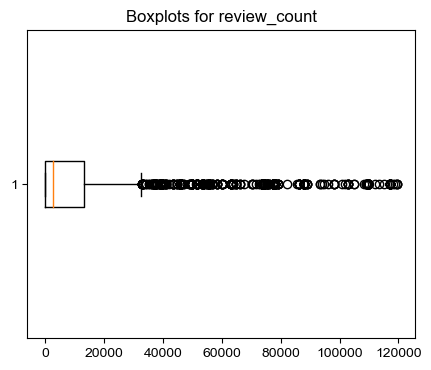

In [1281]:
# ploting box plot after removing outliers
rating_df = remove_outliers(df, 'review_count', 0.01, 0.885)
plot_boxplot(rating_df["review_count"], "review_count")

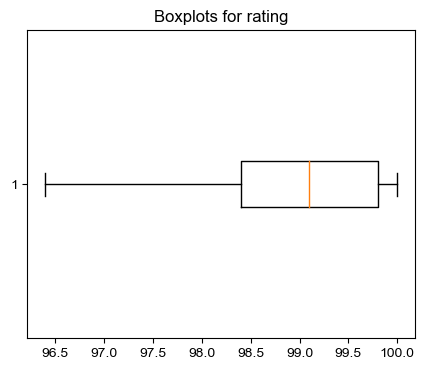

In [1282]:
# ploting box plot after removing outliers
rating_df = remove_outliers(df, 'rating', 0.084, 0.99)
plot_boxplot(rating_df["rating"], "rating")

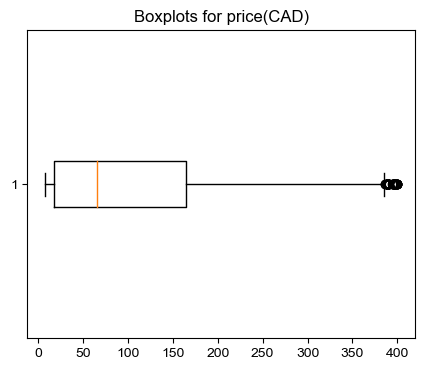

In [1283]:
# ploting box plot after removing outliers
rating_df = remove_outliers(df, 'price(CAD)', 0.01, 0.823)
plot_boxplot(rating_df["price(CAD)"], "price(CAD)")

### **2. Trimming**

In [1299]:
# created a common function that removes outliers by trimming for specific column of a specific dataframe
def trimming_outliers(dataframe, column_name):
    upper_whisker = (dataframe[column_name].quantile(0.75)) + (1.5 * (dataframe[column_name].quantile(0.75)-dataframe[column_name].quantile(0.25)))
    lower_whisker = (dataframe[column_name].quantile(0.25)) - (1.5 * (dataframe[column_name].quantile(0.75)-dataframe[column_name].quantile(0.25)))
    new_df = dataframe.copy()
    index = new_df[(new_df[column_name] > upper_whisker) | (new_df[column_name] < lower_whisker)].index
    new_df.drop(index, inplace=True)
    return new_df

In [1285]:
df.shape

(5892, 12)

In [1286]:
# removed outliers of column 'review_count'
df = trimming_outliers(df, 'review_count')

In [1287]:
# removed outliers of column 'rating'
df = trimming_outliers(df, 'rating')

In [1288]:
# removed outliers of column 'price(CAD)'
df = trimming_outliers(df, 'price(CAD)')

### **3. Log Transformation**

In [1289]:
def log_transformation(new_column_name, curr_column_name):
    log_df = pd.DataFrame()
    log_df[new_column_name]=df[curr_column_name].map(lambda i: np.log(i) if i > 0 else 0)
    return log_df.head(3)

In [1290]:
log_transformation('log_review_count', 'review_count')

,log_review_count
0,7.333023
1,7.333023
2,7.333023


In [1291]:
log_transformation('log_rating', 'rating')

,log_rating
0,4.565389
1,4.565389
2,4.565389


In [1292]:
log_transformation('log_price(CAD)', 'price(CAD)')

,log_price(CAD)
0,6.280021
1,6.150603
2,6.545565


## Step 8: Unsupervised Learning Methods:

### 1. K-Means clustering

In [1293]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [1294]:
# Selecting the relevant columns for clustering
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_columns)

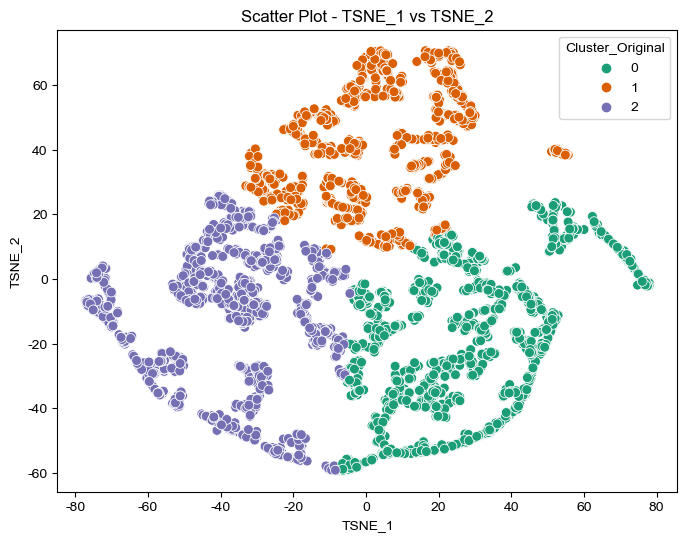

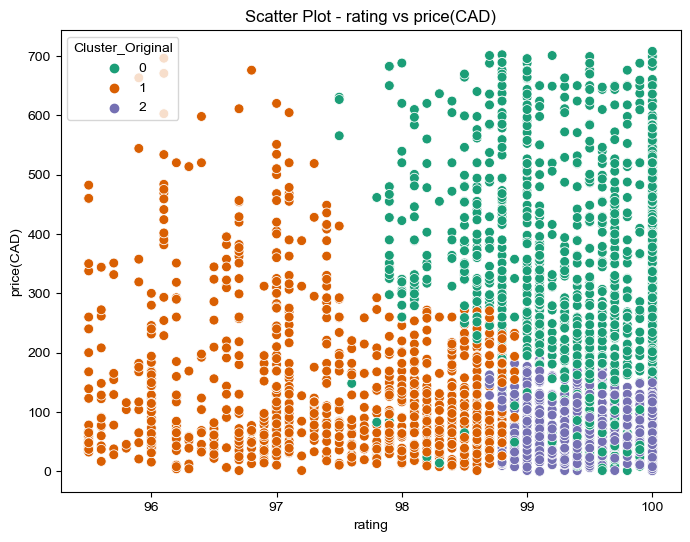

In [1295]:
# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

# Adding t-SNE results to the DataFrame
df['TSNE_1'] = tsne_result[:, 0]
df['TSNE_2'] = tsne_result[:, 1]

# Applying K-Means clustering using the original features
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster_Original'] = kmeans_original.fit_predict(tsne_result)

# Visualizing the clusters
# Creating scatter plots for selected pairs of features
selected_features = [('TSNE_1', 'TSNE_2'), ('rating', 'price(CAD)')]

for feature1, feature2 in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='Cluster_Original', data=df, palette='Dark2', s=50)
    plt.title(f'Scatter Plot - {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

We can see clusters are very good when k = 3 here for both of the graphs when using K-Means clustering

### 2. Gaussian Mixture Model (GMM)

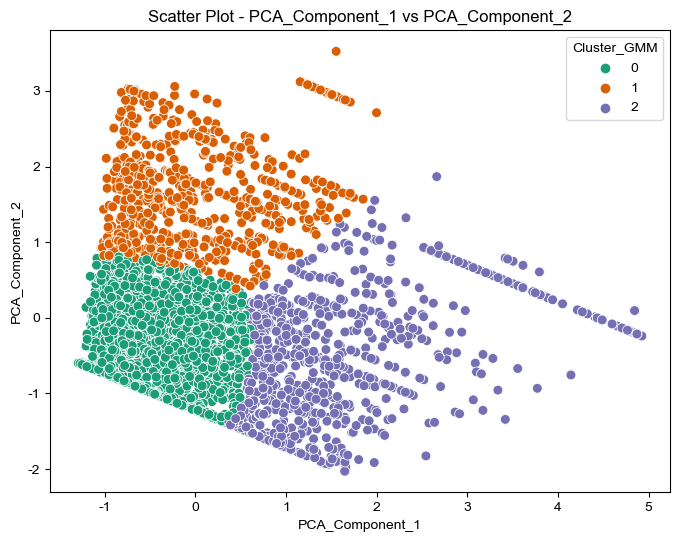

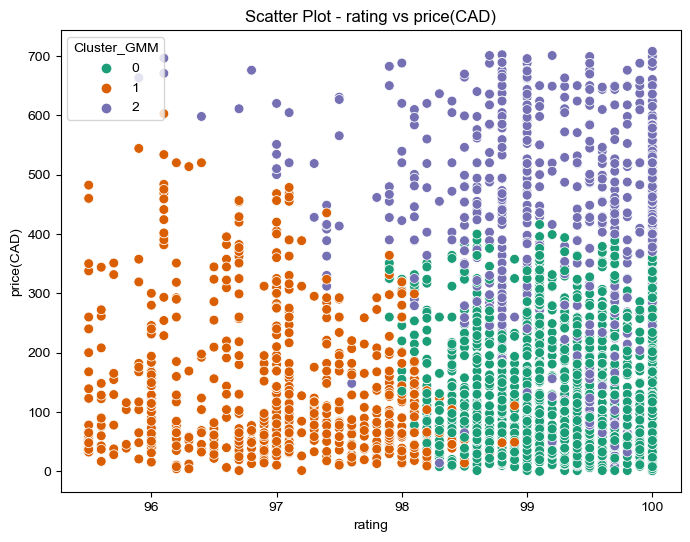

In [1296]:
# Assuming you have a DataFrame called 'df' with the relevant columns

# Importing necessary libraries
from sklearn.mixture import GaussianMixture

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Adding pca results to the DataFrame
df['PCA_Component_1'] = features_pca[:, 0]
df['PCA_Component_2'] = features_pca[:, 1]

# Applying GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(features_pca)

# Visualizing the clusters
# Creating scatter plots for selected pairs of features
selected_features = [('PCA_Component_1', 'PCA_Component_2'), ('rating', 'price(CAD)')]

for feature1, feature2 in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='Cluster_GMM', data=df, palette='Dark2', s=50)
    plt.title(f'Scatter Plot - {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()


we can see in clusters there are 3 clusters and they do not overlap each other

## Step 9 Gradient Boosting Regressor

Mean Squared Error: 0.8932088013441255
R-squared: 0.29197354216986915


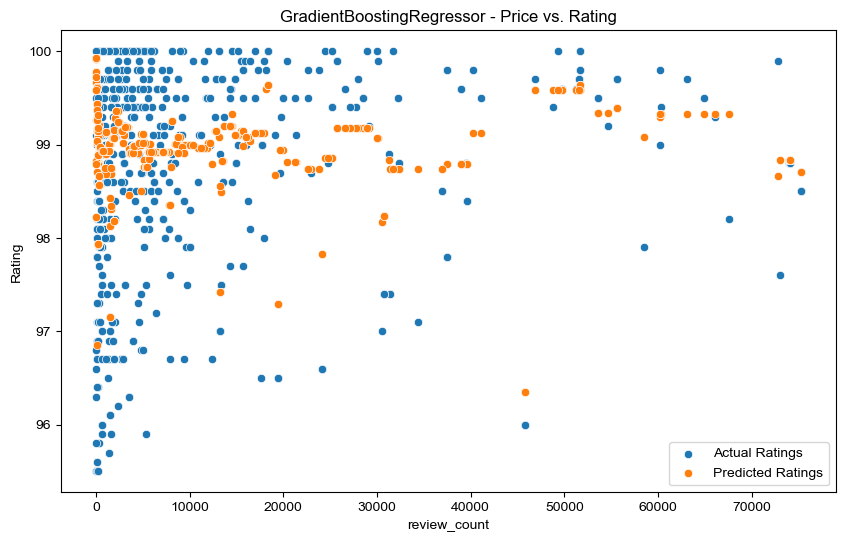

In [1297]:
# importing various functions and libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting feature and target
X = df[['review_count']]
y = df['rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and train the model
model_new = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_new.fit(X_train, y_train)

# Making predictions
y_pred = model_new.predict(X_test)

# Evaluating the model
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# displaying means squared error and r2 score
print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {R2}")

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['review_count'], y=y_test, label='Actual Ratings')
sns.scatterplot(x=X_test['review_count'], y=y_pred, label='Predicted Ratings')
plt.xlabel('review_count')
plt.ylabel('Rating')
plt.title('GradientBoostingRegressor - Price vs. Rating')
plt.legend()
plt.show()

We can see in above graph the predicted ratings overlap actual ratings so we can say that model is good

## Step-10 Testing the model

In [1298]:
new_data = pd.DataFrame({'review_count': [499500.0]})
predicted_rating = model_new.predict(new_data)
print(predicted_rating)

[98.70976718]


## Thank You!!!